# Linear Sequential Estimation

In [28]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

np.random.seed(1)

In [29]:
# Import functions directly from github
# Important: note that we use raw.githubusercontent.com, not github.com

import requests
url = 'https://raw.githubusercontent.com/florisvb/Nonlinear_and_Data_Driven_Estimation/main/Utility/plot_utility.py'
r = requests.get(url)

# Store the file to the colab working directory
with open('plot_utility.py', 'w') as f:
    f.write(r.text)

# import the function we want from that file
from plot_utility import plot_tme

# Generate sample time series data

In [30]:
t = np.linspace(0, 6, 500)
x = np.array([[1, 1, 2, -0.4e-4]]).T
H = np.vstack([t, np.sin(t), np.cos(2*t), np.exp(t)]).T
y = H@x

# Add some normal (gaussian) noise

In [31]:
# Example for Gaussian (normal) random variable

noise_mean = 0
noise_std = 0.5

v = np.column_stack(np.random.normal(noise_mean, noise_std, len(y))).T

In [32]:
y_tilde = y+v

# Plotting

<Axes: xlabel='Time', ylabel='y'>

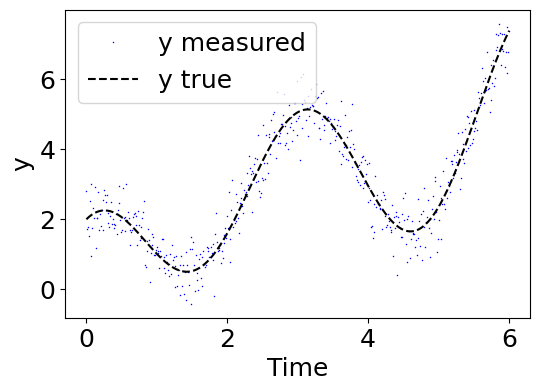

In [33]:
plot_tme(t, y, y_tilde)

# Candidate models

In [34]:
model_1_H = np.vstack([t, np.sin(t), np.cos(2*t)]).T

# Exercise

Implement Linear Sequential Estimation, and plot the three parameters of $x$ over time

In [35]:
#W = np.identity

#X_hat_K+1 = X_hat_K + K_k+1(y_tilde_k+1 - H_k+1 * X_hat_K)
#K_K+1 = H_k+1.T * W_k+1 * H_k+1
#np.linalg.inv(P_k+1) = np.linalg.inv(P_k) + H_k+1.T * W_k+1 * H_k+1


In [ ]:
n_samples = len(t)
n_params = model_1_H.shape[1]

# Initialize the estimate and covariance
x_hat = np.zeros((n_samples, n_params, 1))
P = 10 * np.identity(n_params) # Large initial covariance

# Store the history of x_hat
x_hat_history = np.zeros((n_samples, n_params))

In [43]:
n_samples = len(t)
n_params = model_1_H.shape[1]

# Initialize the estimate and covariance
x_hat = np.zeros((n_samples, n_params, 1))
P = 10 * np.identity(n_params) # Large initial covariance

# Store the history of x_hat
x_hat_history = np.zeros((n_samples, n_params))

# Assuming a known noise covariance R (for simplicity, using noise_std)
R = noise_std**2 * np.identity(1) # R is a scalar since y is a scalar

# Linear Sequential Estimation loop
for k in range(n_samples):
    H_k = model_1_H[k, :].reshape(1, n_params) # Reshape H_k to be 1x n_params

    # Kalman Gain
    K_k = P @ H_k.T @ np.linalg.inv(H_k @ P @ H_k.T + R)

    # Update the estimate
    if k == 0:
        x_hat[k] = x_hat[k] + K_k @ (y_tilde[k].reshape(-1,1) - H_k @ x_hat[k])
    else:
        x_hat[k] = x_hat[k-1] + K_k @ (y_tilde[k].reshape(-1,1) - H_k @ x_hat[k-1])


    # Update the covariance
    P = (np.identity(n_params) - K_k @ H_k) @ P

    # Store the estimate history
    x_hat_history[k, :] = x_hat[k].flatten()

display(x_hat_history)

array([[ 0.        ,  0.        ,  2.74354408],
       [-0.24820259, -0.24819661,  2.24022179],
       [-0.45882262, -0.45879124,  2.09848434],
       ...,
       [ 1.00882332,  1.04669003,  1.9917376 ],
       [ 1.00810374,  1.04600793,  1.98924624],
       [ 1.00804219,  1.04594693,  1.9890316 ]])

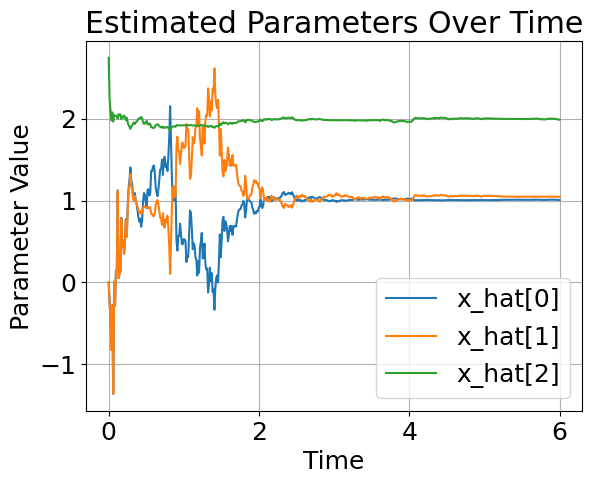

In [42]:
plt.figure()
for i in range(n_params):
    plt.plot(t, x_hat_history[:, i], label=f'x_hat[{i}]')

plt.xlabel('Time')
plt.ylabel('Parameter Value')
plt.title('Estimated Parameters Over Time')
plt.legend()
plt.grid(True)
plt.show()